In [1]:
import platform as python_platform

class Platform:
    WINDOWS = "Windows"
    MACOS = "Darwin"

platform = python_platform.system()

windows_root_directory = "D:/Vector A/0. KHTN/Nam 4/HKII/Thesis/Brainstorming/DataCrawling"
mac_root_directory = "/Users/4rr311/Documents/VectorA/KHTN/Nam4/HKII/Thesis/Brainstorming/DataCrawling"

root_directory = windows_root_directory if platform == Platform.WINDOWS else mac_root_directory

In [2]:
import os
from os.path import join, getsize
import re

import sys
sys.path.append(root_directory)

import matplotlib.pyplot as plt
import pandas as pd

import file_utils as fu

In [3]:
json_directory = fu.relative_to_absolute_path(
    "GetAllSongHTML/song_list/json",
    root_path=root_directory
)

raw_html_directory = fu.relative_to_absolute_path(
    "GetAllSongHTML/song_list/raw_html",
    root_path=root_directory
)

In [4]:
json_song_list_link_by_artist_dir = fu.relative_to_absolute_path(
    "GetAllSongHTML/song_list_link_by_artist/json",
    root_path=root_directory
)

In [5]:
# Đếm bài hát đã lấy (raw html) tương ứng với letter
def count_raw_html_songs_by_letter(letter):
    letter_directory = f"{raw_html_directory}/{letter.lower()}"

    return sum([1 for root, dirs, files in os.walk(letter_directory) for file in files])

In [6]:
# Đếm số bài hát cần lấy trong file json tương ứng với letter
def count_songs_in_json_by_letter(letter):
    letter_json_file_path = f"{json_song_list_link_by_artist_dir}/{letter.lower()}.json"
    
    n_song = len(fu.read_data_from_json_file(letter_json_file_path))

    return n_song

In [7]:
def compare_songs_by_letter(letter):
    n_raw_html_songs = count_raw_html_songs_by_letter(letter)
    n_songs_in_json = count_songs_in_json_by_letter(letter)
    print(f"Letter {letter}: {n_raw_html_songs} of {n_songs_in_json} songs have been crawled")

for letter in range(ord('a'), ord('z') + 1):
    compare_songs_by_letter(chr(letter))

Letter a: 1315 of 1314 songs have been crawled
Letter b: 1591 of 1590 songs have been crawled
Letter c: 1349 of 1349 songs have been crawled
Letter d: 53 of 1275 songs have been crawled
Letter e: 0 of 671 songs have been crawled
Letter f: 0 of 679 songs have been crawled
Letter g: 0 of 903 songs have been crawled
Letter h: 0 of 714 songs have been crawled
Letter i: 0 of 307 songs have been crawled
Letter j: 0 of 1496 songs have been crawled
Letter k: 0 of 1522 songs have been crawled
Letter l: 0 of 1121 songs have been crawled
Letter m: 0 of 1472 songs have been crawled
Letter n: 0 of 1176 songs have been crawled
Letter o: 0 of 379 songs have been crawled
Letter p: 0 of 1069 songs have been crawled
Letter q: 0 of 63 songs have been crawled
Letter r: 0 of 973 songs have been crawled
Letter s: 0 of 1436 songs have been crawled
Letter t: 0 of 1772 songs have been crawled
Letter u: 0 of 139 songs have been crawled
Letter v: 0 of 190 songs have been crawled
Letter w: 0 of 514 songs have bee

In [8]:
# Thống kê kích thước các file trong thư mục raw_html vào dataframe
def get_size_of_raw_html_files():
    df = pd.DataFrame(columns=["file_name", "size_in_bytes"])
    
    for root, dirs, files in os.walk(raw_html_directory):
        for file in files:
            file_path = join(root, file)
            size = getsize(file_path)
            # FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
            df = pd.concat([df, pd.DataFrame({"file_name": [file], "size_in_bytes": [size]})], ignore_index=True)

    # Sort the dataframe by size
    df = df.sort_values(by="size_in_bytes", ascending=False)
    
    return df

In [9]:
files_size = get_size_of_raw_html_files()
df = pd.DataFrame(files_size)
df.head(df.shape[0])

,file_name,size_in_bytes
1090,the-trend.html,1284603
689,run-away-with-me.html,1156731
1308,back-to-the-future-theme.html,937483
1218,set-fire-to-the-rain.html,759716
2405,united.html,719083
...,...,...
1165,the-hero-waits.html,215919
2813,oceania.html,153379
1,.DS_Store,102404
2718,.DS_Store,30724


<Axes: xlabel='file_name'>

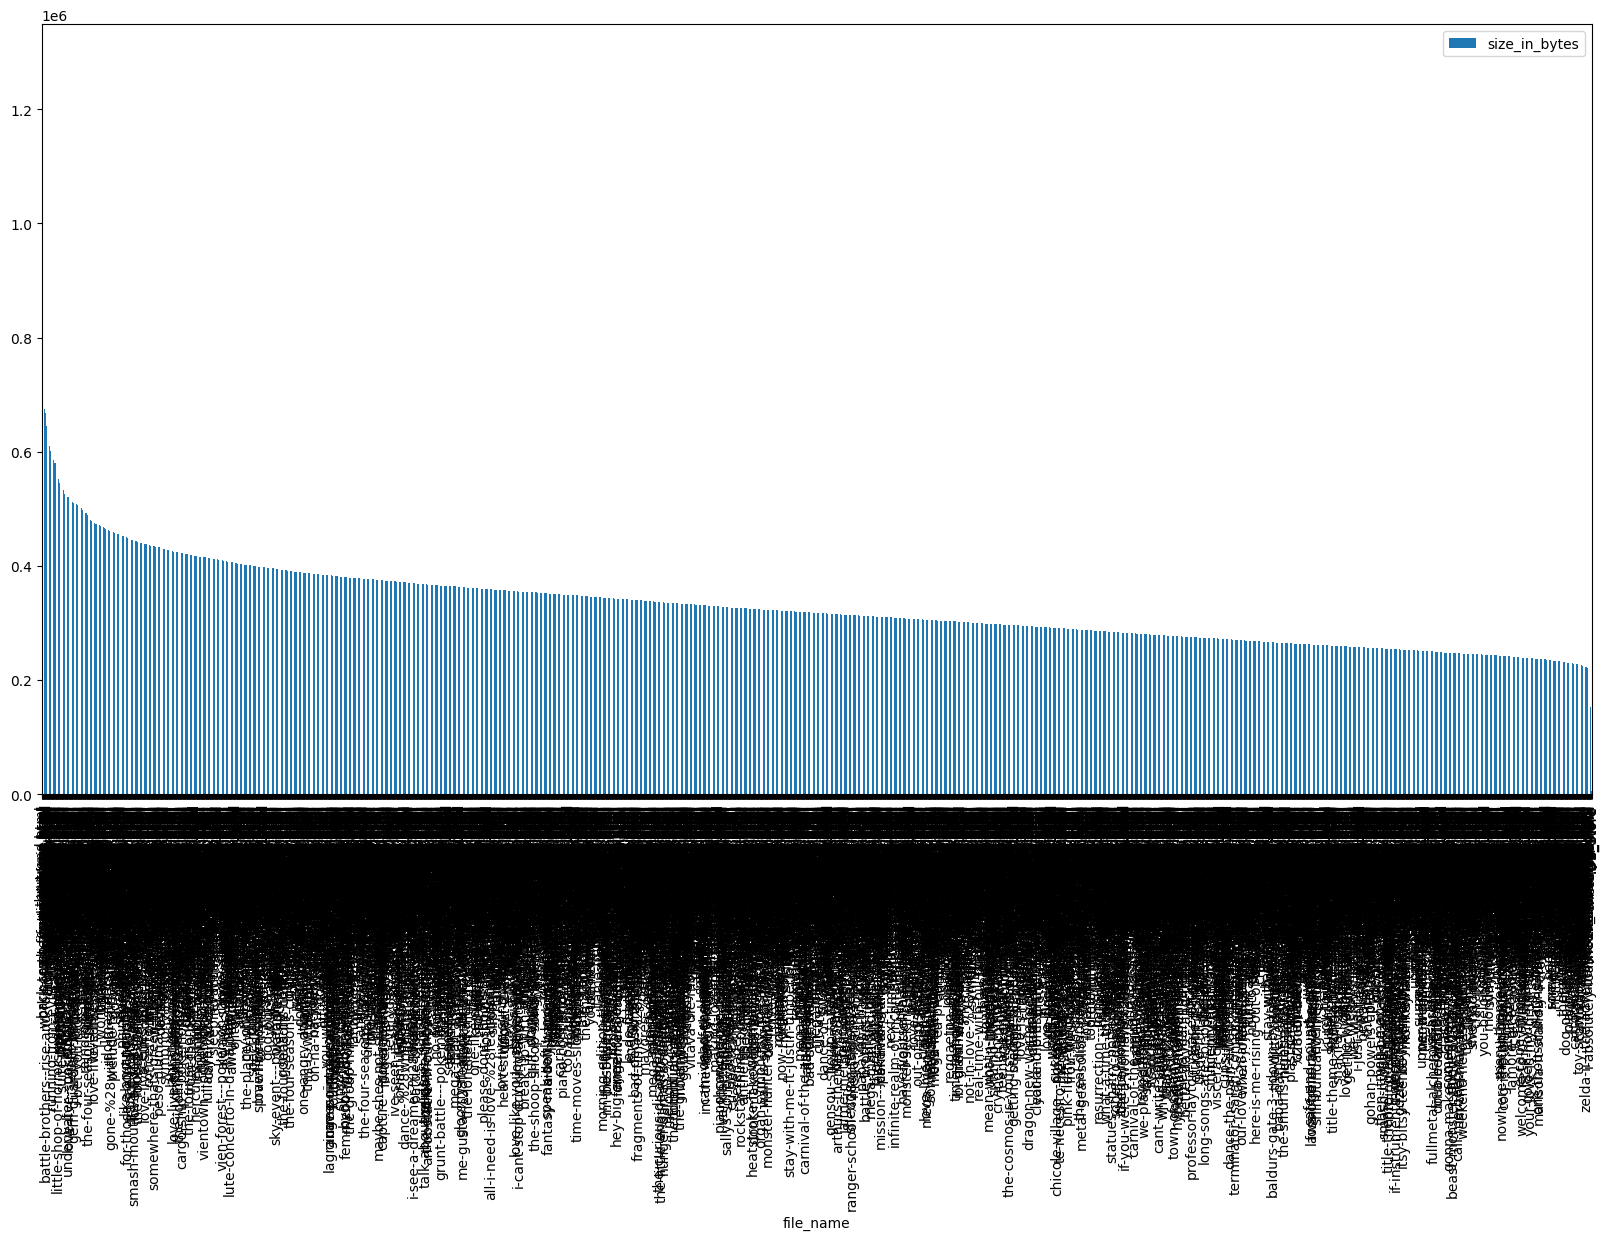

In [10]:
df.plot(kind="bar", x="file_name", y="size_in_bytes", figsize=(20, 10))

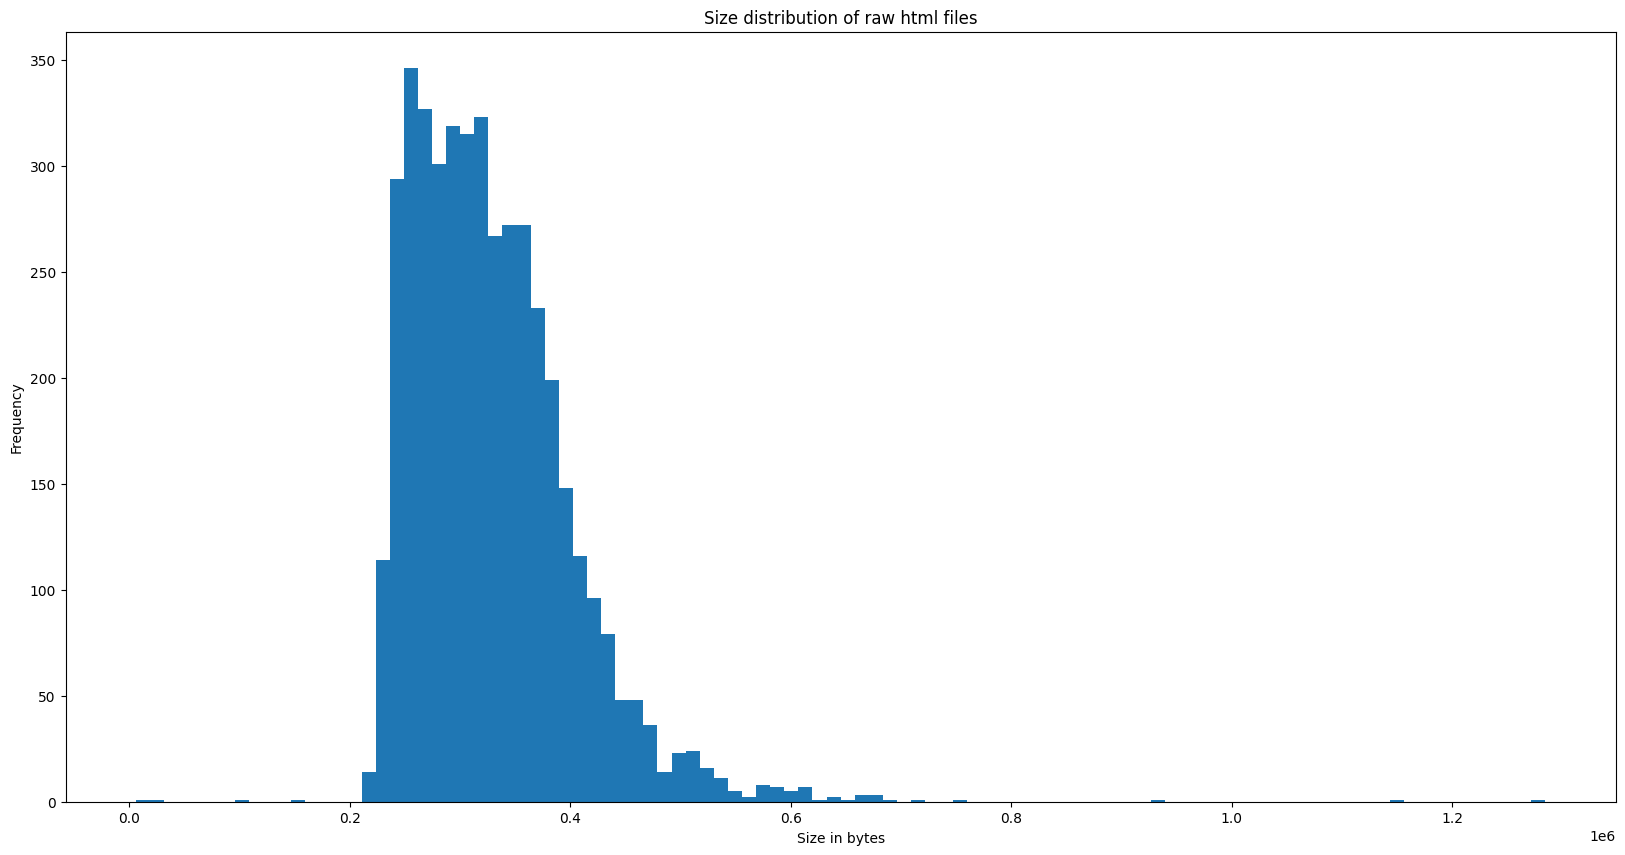

In [11]:
def plot_size_distribution():
    plt.figure(figsize=(20, 10))
    plt.hist(df["size_in_bytes"], bins=100)
    plt.title("Size distribution of raw html files")
    plt.xlabel("Size in bytes")
    plt.ylabel("Frequency")
    plt.show()

plot_size_distribution()

(1717, 2)


<Axes: xlabel='file_name'>

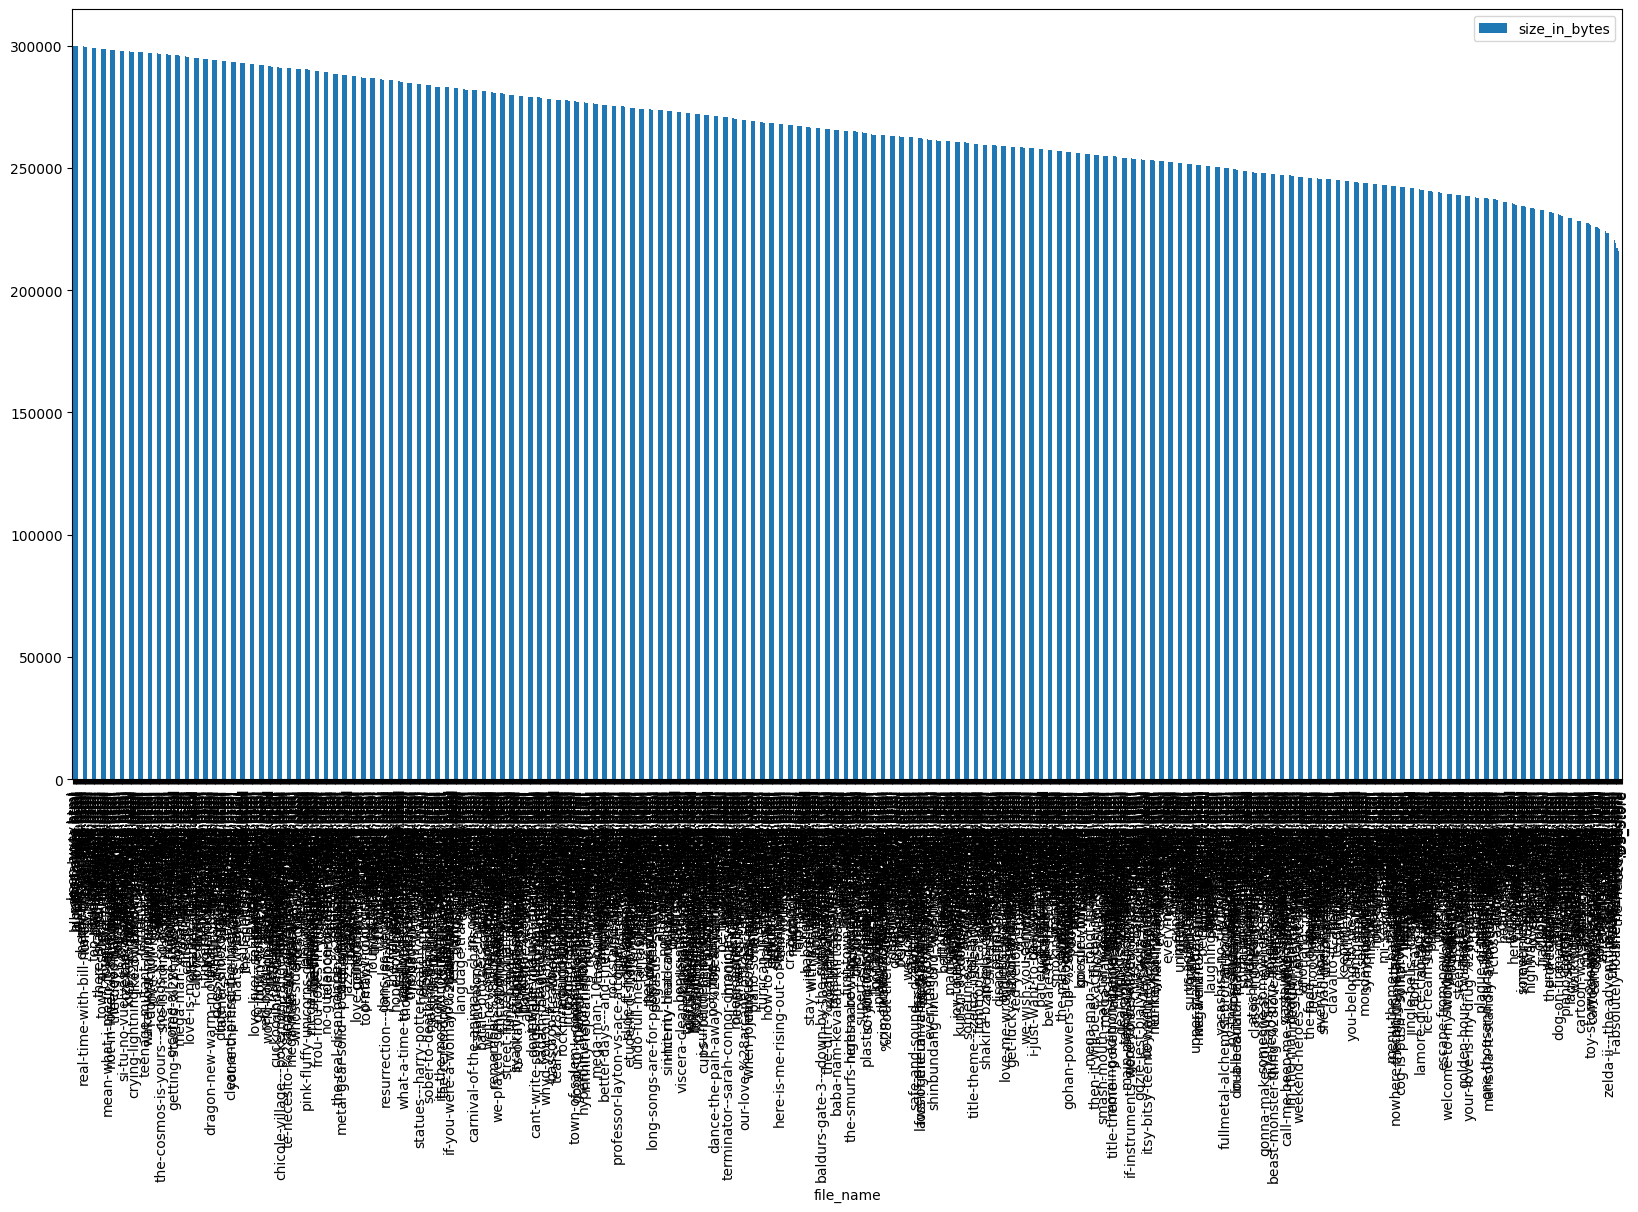

In [12]:
# Lọc ra các file có kích thước nhỏ hơn 300kb và trực quan hóa
df = df[df["size_in_bytes"] < 300000]
print(df.shape)
df.plot(kind="bar", x="file_name", y="size_in_bytes", figsize=(20, 10))

(442, 2)


<Axes: xlabel='file_name'>

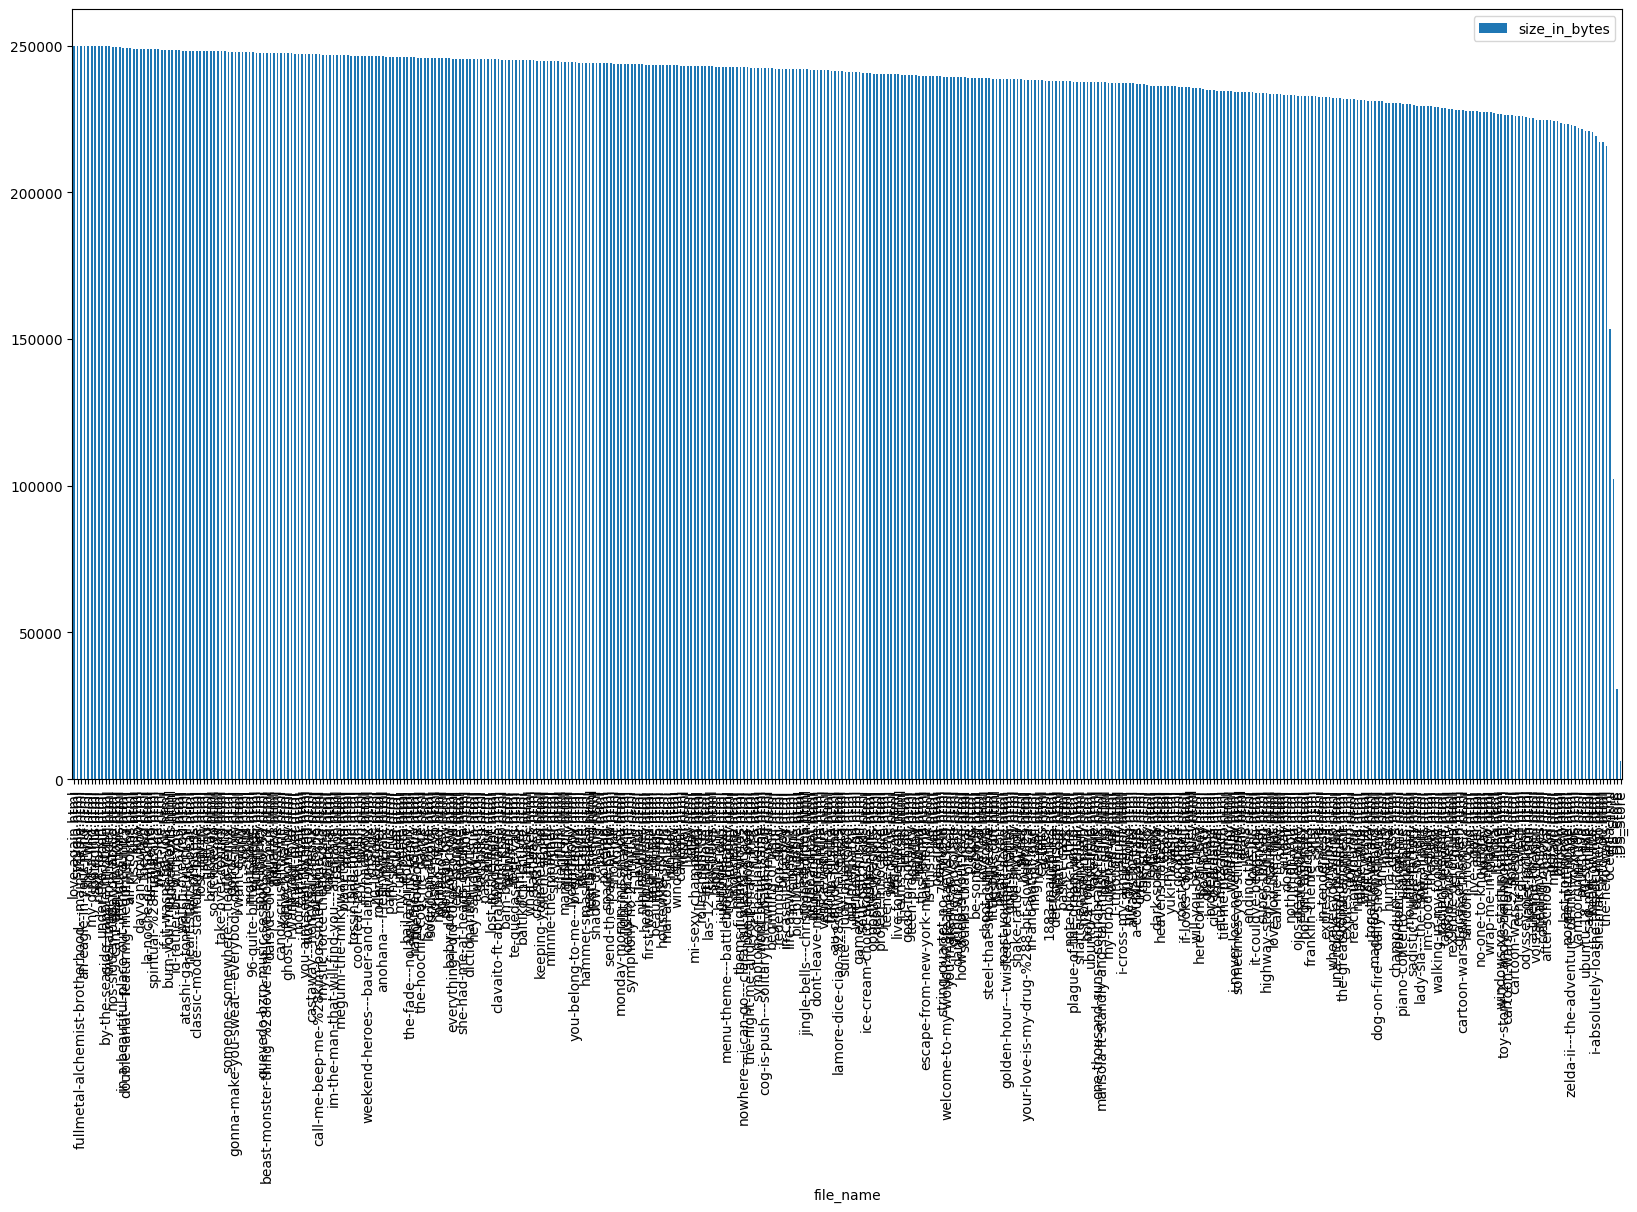

In [13]:
# Lọc ra các file có kích thước nhỏ hơn 250kb và trực quan hóa
df = df[df["size_in_bytes"] < 250000]
print(df.shape)
df.plot(kind="bar", x="file_name", y="size_in_bytes", figsize=(20, 10))

In [14]:
# Print full dataframe
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)
print(df)

                                                 file_name size_in_bytes
2964                                       love-again.html        249918
2301                                          syzygia.html        249912
87       fullmetal-alchemist-brotherhood---main-theme.html        249873
3173                            an-eagle-in-your-mind.html        249829
2272                                        the-twist.html        249820
2232                                   my-ding-a-ling.html        249804
3703                                       spotlights.html        249791
106                                       next-to-kin.html        249783
707                                    under-the-moon.html        249769
771                   by-the-seaside---apple-ringtone.html        249734
2073                           the-farmer-in-the-dell.html        249715
1795                         nos-siguen-pegando-abajo.html        249606
3117                                cant-deny-my-lo